In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from SerialSectionsReg import SerialSectionsReg
import cv2
from hephaestus.data.ndpwrapper_v2 import Slide_ndpread
from scipy.ndimage import label
from sklearn.linear_model import LinearRegression

In [5]:
for f in [file for file in os.listdir("result/inference_CSV/") if not file.startswith(".")]:
    tmp = os.path.join("result/inference_CSV/",f,"df.csv")
    print(f"'{tmp}',")

'result/inference_CSV/2019-10-30 02.15.32/df.csv',
'result/inference_CSV/2019-10-30 02.10.47/df.csv',
'result/inference_CSV/2019-10-30 02.09.05/df.csv',
'result/inference_CSV/2019-10-30 02.03.40/df.csv',
'result/inference_CSV/2019-10-30 02.04.50/df.csv',
'result/inference_CSV/2019-10-30 02.23.07/df.csv',
'result/inference_CSV/2019-10-30 02.18.03/df.csv',
'result/inference_CSV/2019-10-30 02.13.08/df.csv',
'result/inference_CSV/2019-10-30 02.02.21/df.csv',
'result/inference_CSV/350013D01170 - 2019-10-30 02.21.40/df.csv',
'result/inference_CSV/2019-10-30 02.14.37/df.csv',
'result/inference_CSV/2019-10-30 01.59.42/df.csv',
'result/inference_CSV/2019-10-30 02.01.19/df.csv',
'result/inference_CSV/2019-10-30 02.05.46/df.csv',
'result/inference_CSV/2019-10-30 02.19.24/df.csv',
'result/inference_CSV/2019-10-30 02.07.27/df.csv',


In [6]:
TEST_IMG = "result/inference_CSV/2019-10-30 02.01.19/df.csv"
ADIP_IMG = "result/inference_CSV/2019-10-30 02.02.21/df.csv"
ALL_IMG = ['result/inference_CSV/2019-10-30 02.15.32/df.csv',
            'result/inference_CSV/2019-10-30 02.10.47/df.csv',
            'result/inference_CSV/2019-10-30 02.09.05/df.csv',
            'result/inference_CSV/2019-10-30 02.03.40/df.csv',
            'result/inference_CSV/2019-10-30 02.04.50/df.csv',
            'result/inference_CSV/2019-10-30 02.23.07/df.csv',
            'result/inference_CSV/2019-10-30 02.18.03/df.csv',
            'result/inference_CSV/2019-10-30 02.13.08/df.csv',
            'result/inference_CSV/2019-10-30 02.02.21/df.csv',
            'result/inference_CSV/350013D01170 - 2019-10-30 02.21.40/df.csv',
            'result/inference_CSV/2019-10-30 02.14.37/df.csv',
            'result/inference_CSV/2019-10-30 01.59.42/df.csv',
            'result/inference_CSV/2019-10-30 02.01.19/df.csv',
            'result/inference_CSV/2019-10-30 02.05.46/df.csv',
            'result/inference_CSV/2019-10-30 02.19.24/df.csv',
            'result/inference_CSV/2019-10-30 02.07.27/df.csv',]
TEST_PATH = "/mnt/cephrbd/data/A19001_NCKU_SKIN/Image/20191106/2019-10-30 02.01.19.ndpi"
TEST_DIR = "/mnt/cephrbd/data/A19001_NCKU_SKIN/Image/20191106/"
TYPES = ['Background', 'Inflammatory infiltration', 'Adipose tissue', 'Sweat gland', 'Hair follicles', 'Dermis', 'Sebaceous gland', 'Epidermis', 'Blood vessels', 'Muscle']
COLOR_TABLE = {
    0:{"class": "Background",
       "colorcode": (255, 255, 255)
      },
    1:{"class": "Inflammatory infiltration",
       "colorcode": (255, 87, 34)
      },
    2:{"class": "Adipose tissue",
       "colorcode": (233, 30, 99)
      },
    3:{"class": "Sweat gland",
       "colorcode": (205, 220, 57)
      },
    4:{"class": "Hair follicles",
       "colorcode": (0, 0, 153)
      },
    5:{"class": "Dermis",
       "colorcode": (76, 175, 80)
      },
    6:{"class": "Sebaceous gland",
       "colorcode": (156, 39, 176)
      },
    7:{"class": "Epidermis",
       "colorcode": (3, 169, 244)
      },
    8:{"class": "Blood vessels", #??
       "colorcode": (255, 0, 0)
      },
    9:{"class": "Muscle", #??
       "colorcode": (181, 136, 24)
      },
}


In [7]:
def df2thumbnail(df):
    w = np.max(df["w"]) + 1
    h = np.max(df["h"]) + 1
    data = df.to_numpy().reshape((h, w, -1))[..., 2:].argmax(axis=-1)
    #img = np.tile(np.expand_dims(data, axis=-1), (1, 1, 3)).astype(np.uint8)
    color_img = np.zeros((*data.shape, 3), dtype=np.uint8)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            color_img[i, j] = COLOR_TABLE[data[i, j]]["colorcode"]
    return data, color_img

In [8]:
df = pd.read_csv(TEST_IMG)
df2thumbnail(df)

(array([[0, 0, 0, ..., 0, 4, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [  0,   0, 153],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
  

In [9]:
w = np.max(df["w"]) + 1
h = np.max(df["h"]) + 1
print(f"w = {w}, h = {h}")
types = list(df.columns[2:])
print(types)
data = df.to_numpy().reshape((h, w, -1))[..., 2:].argmax(axis=-1)
print(data.shape)

w = 278, h = 77
['Background', 'Inflammatory infiltration', 'Adipose tissue', 'Sweat gland', 'Hair follicles', 'Dermis', 'Sebaceous gland', 'Epidermis', 'Blood vessels', 'Muscle']
(77, 278)


In [10]:
print(type(data))

<class 'numpy.ndarray'>


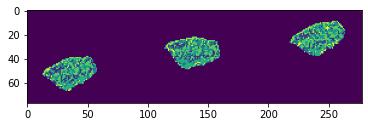

In [11]:
plt.imshow(data)
plt.show()

224


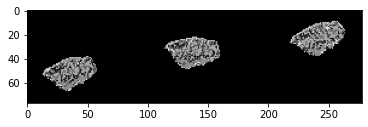

In [12]:
img = np.tile(np.expand_dims(data, axis=-1), (1, 1, 3)).astype(np.uint8)
img *= 28
print(np.max(img))
plt.imshow(img)
plt.show()

In [13]:
this_slide = Slide_ndpread(TEST_PATH)
thumbnail  = this_slide.get_patch_with_resize((0 , 0), src_sz = this_slide.get_size(), dst_sz=(w*16, h*16))

Width: 142080 , Height: 39168


(1232, 4448, 3)


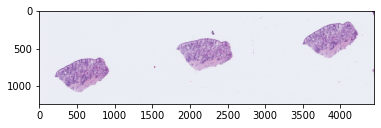

In [14]:
print(thumbnail.shape)
plt.imshow(thumbnail)
plt.show()

In [15]:
serialSectionsReg = SerialSectionsReg.SerialSectionsReg(thumbnail)
results = serialSectionsReg.cluster_and_registrate()

In [16]:
results

[{'top': 615, 'left': 207, 'width': 728, 'height': 465, 'angle': 0}]

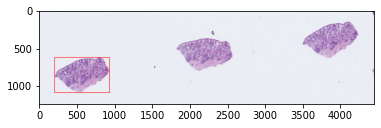

In [17]:
resize_ratio = 1
for res in results:
    cv2.rectangle(thumbnail, (res["left"]*resize_ratio, res["top"]*resize_ratio),
                              ((res["left"] + res["width"])*resize_ratio,
                              (res["top"] + res["height"])*resize_ratio),
                              color=(255, 0, 0), thickness=5)
plt.imshow(thumbnail)
plt.show()

In [18]:
fig1 = plt.figure(figsize=(20, 60))
for i, img in enumerate(img_list):
    ax = fig1.add_subplot(len(img_list), 1, i+1)
    ax.imshow(img_list[i])
plt.show()

NameError: name 'img_list' is not defined

<Figure size 1440x4320 with 0 Axes>

## Criteria one: distant to epithelium
    epi_regions, inf_regions <-- test_img
    inf_centers, inf_weight <-- inf_regions
    epi_lines <-- epi_regions
    find min distance of inf_centers and epi_regions

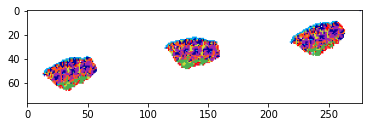

In [19]:
test_img, color_img = df2thumbnail(pd.read_csv(TEST_IMG))
plt.imshow(color_img)
plt.show()

In [20]:
def segment_region(mask):
    labels, numL = label(mask)
    label_indices = [(labels == i).nonzero() for i in range(1, numL+1)]
    return label_indices

def compute_areas(mask):
    labels, numL = label(mask)
    areas = [np.sum(labels == i) for i in range(0, numL+1)]
    return labels, areas

def region_linear_regression(regions):
    # Arg: [(array x, array y)...]
    # Return: format: [(a, b), (a', b')...], a is slope, b is intercept
    regions = [segment for segment in regions if len(segment[0]) > 10]
    regression_coefficients = []
    for region in regions:
        model = LinearRegression().fit(region[0].reshape((-1, 1)), region[1])
        regression_coefficients.append([model.coef_[0], model.intercept_])
    return regression_coefficients

def find_nearest_dist_and_point(regions, centers):
    '''
    Arg: regions: [[xs, ys],...]
         centers: [[x_c, y_c]...]
    return: [(D1, p1), (D2, p2)...]
    '''
    xs = np.array([x for region in regions for x in region[0]])
    ys = np.array([y for region in regions for y in region[1]])
    xc = centers[:, 0]
    yc = centers[:, 1]
    
    dist_matrix =  np.square(np.tile(np.expand_dims(xs, 0), (len(xc), 1))-np.tile(np.expand_dims(xc, -1), (1, len(xs))))
    dist_matrix += np.square(np.tile(np.expand_dims(ys, 0), (len(yc), 1))-np.tile(np.expand_dims(yc, -1), (1, len(ys))))
    
    min_dist = np.min(dist_matrix, axis= -1)
    min_dist = np.sqrt(min_dist)
    min_arg  = np.argmin(dist_matrix, axis= -1)
    return min_dist, min_arg

In [21]:
def visualize_(image, centers, nearest):
    pseudoimage = np.copy(image)
    fig2 = plt.figure(figsize=(15, 10))
    ax = fig2.add_subplot(2, 1, 1)
    ax.imshow(pseudoimage)
    for i in range(len(centers)):
        center = tuple([int(ele) for ele in centers[i]][::-1])
        near= tuple([int(ele) for ele in nearest[i]][::-1])
        #cv2.line(pseudoimage, center, near, (255, 255, 255), thickness=1)
        ax.plot([center[0], near[0]], [center[1], near[1]], color='w')
    
    ax = fig2.add_subplot(2, 1, 2)
    plt.imshow(image)
    plt.show()

def find_mean_and_var_dist(image, )
    mean_dist = np.dot(min_dist, center_size)*1./np.sum(center_size)
    var_dist  = np.dot(np.square(min_dist-mean_dist), center_size)/np.sum(center_size)
    return mean_dist,var_dist

In [22]:
epi_mask = (test_img == 7)
inf_mask = (test_img == 1)
epi_regions = segment_region(epi_mask)
inf_regions = segment_region(inf_mask)

inf_centers = np.array([[inf_region[0].mean(), inf_region[1].mean()] for inf_region in inf_regions])
center_size = np.array([len(inf_region[0]) for inf_region in inf_regions])

epi_regions = [epi_region for epi_region in epi_regions if len(epi_region[0])>= 4]
print(len(epi_regions))

print("Size of inflammation: ", len(inf_centers))

18
Size of inflammation:  150


In [23]:
min_dist, min_arg = find_nearest_dist_and_point(epi_regions, inf_centers)
xs = np.array([x for region in epi_regions for x in region[0]])
ys = np.array([y for region in epi_regions for y in region[1]])
nearest = np.hstack((xs[min_arg].reshape((-1, 1)), ys[min_arg].reshape((-1, 1))))

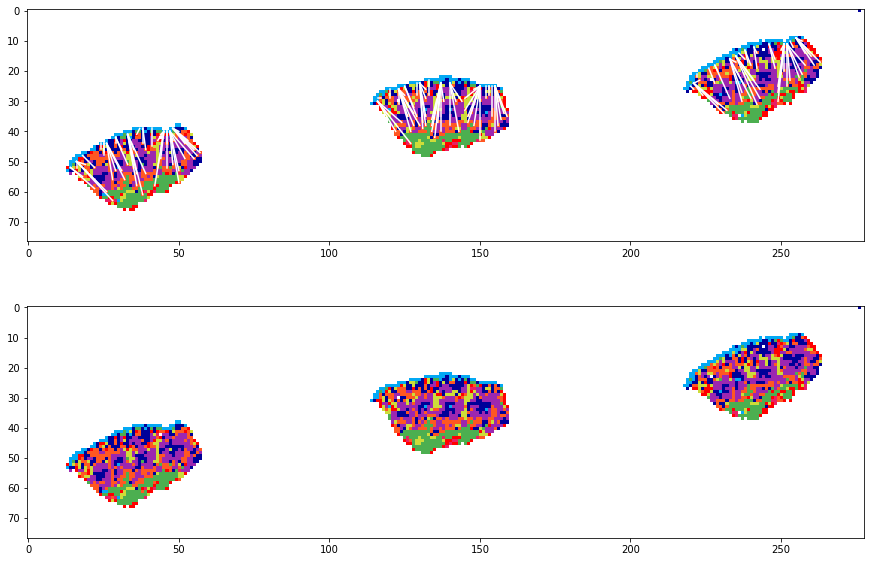

In [24]:
visualize_(color_img, inf_centers, nearest)

In [25]:
mean_dist = np.dot(min_dist, center_size)*1./np.sum(center_size)
var_dist  = np.dot(np.square(min_dist-mean_dist), center_size)/np.sum(center_size)

In [26]:
print(mean_dist, var_dist)

9.258187276615994 24.559773268209923


## Criteria 2: Perifolliculitis
    create zero mask
    dfs from each follicle region, search inflammation

side_count = 275
contact area = 203.0


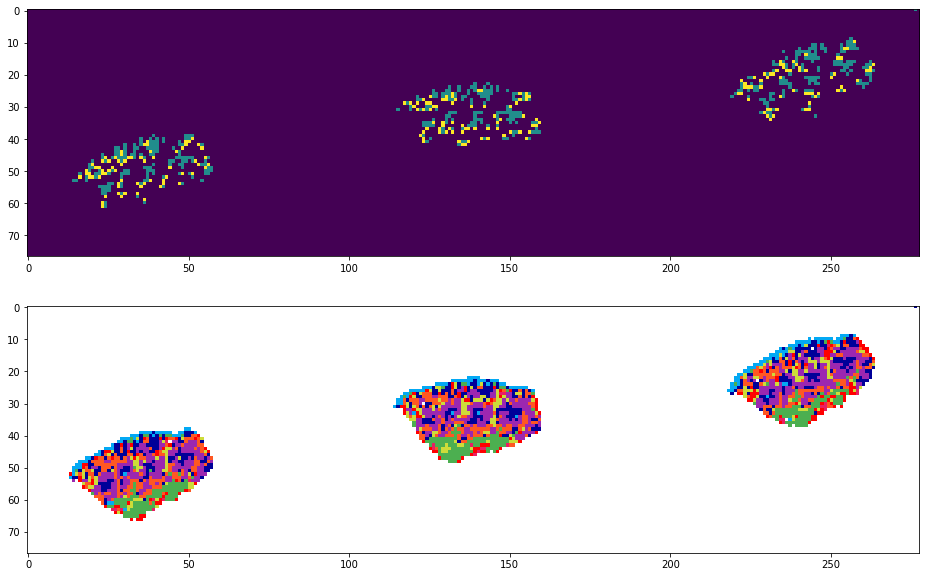

In [27]:
contact_mask = np.zeros(test_img.shape[:2])
visit_mask   = np.zeros(test_img.shape[:2])
dirs = [(-1, 0), (1, 0), (0, 1), (0, -1)]


def dfs(image, x, y, side_count):
    if visit_mask[x, y] == 1:
        return
    visit_mask[x,y] = 1
    #print(f"Checking ({x}, {y})")
    for dx, dy in dirs:
        # is inflammation
        if x+dx < 0 or x+dx >= image.shape[0] or y+dy < 0 or y+dy >= image.shape[1]:
            continue
        if image[x+dx, y+dy] == 1:
            contact_mask[x+dx, y+dy] = 1
            side_count[0] += 1
        if image[x+dx, y+dy] == 4 and visit_mask[x+dx, y+dy] ==0:
            dfs(image, x+dx, y+dy, side_count)
    
follicle_region=segment_region(test_img == 4)
xs = [x for region in follicle_region for x in region[0]]
ys = [y for region in follicle_region for y in region[1]]
side_count = [0]
for i in range(len(xs)):
    dfs(test_img, xs[i], ys[i], side_count)

print(f"side_count = {side_count[0]}")
print(f"contact area = {np.sum(contact_mask)}")
fig3 = plt.figure(figsize=(20, 10))
ax = fig3.add_subplot(2, 1, 1)
ax.imshow(contact_mask*255+np.array((test_img==4), dtype=np.uint8)*125)
ax = fig3.add_subplot(2, 1, 2)
ax.imshow(color_img)
plt.show()

## Criteria 3: Lymphocyte area/Tissue area
    for each contiguous lymphocyte aggregate:
        set_list <-- lymphocyte aggregate
    tissue set < -- scipy label
    for each set in set_list:
        tissue segment = check tissue segment number by first element of set
        print(len(set), len(tissue segment))

In [28]:
tissue_labels, numL = label(test_img>0)
tissue_area = [for i in range(1, numL)]
print(numL)
plt.imshow(tissue_labels)
plt.show()

SyntaxError: invalid syntax (<ipython-input-28-831c161fc7bd>, line 2)

In [29]:
tissue_labels, tissue_area = compute_areas(test_img>0)


for inf_region in inf_regions:
    x, y = inf_region[0][0], inf_region[1][0]
    tissue_id = tissue_labels[x, y]
    print(f"Inf area = {inf_region[0].shape[0]}, Tissue area={tissue_area[tissue_id]}")


Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 2, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 2, Tissue area=830
Inf area = 2, Tissue area=830
Inf area = 7, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 4, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 2, Tissue area=830
Inf area = 3, Tissue area=830
Inf area = 22, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 3, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 4, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 8, Tissue area=830
Inf area = 1, Tissue area=830
Inf area = 2, Tissue area=846
Inf area = 1, Tissue area=830
Inf area = 14, Tissue area=830
Inf area = 1, Tissue area=830
Inf area

## Criteria 4: Lymphocyte, Adipose tissue area

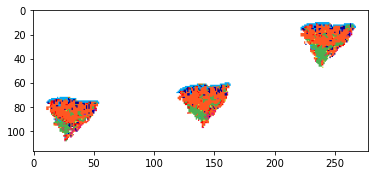

In [30]:
adipose_img, color_adipose = df2thumbnail(pd.read_csv(ADIP_IMG))
plt.imshow(color_adipose)
plt.show()

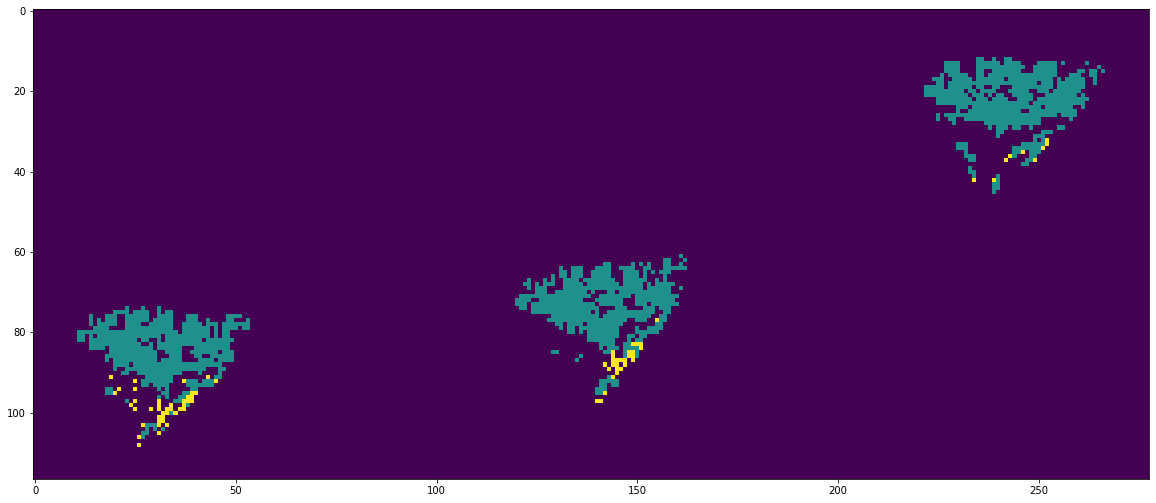

In [31]:
adipose_mask = adipose_img==2
inf_mask     = adipose_img==1
fig4 = plt.figure(figsize=(20, 10))
plt.imshow(inf_mask*0.5 + adipose_mask)
plt.show()

In [32]:
class DFS:
    def __init__(self, image, interest_id, inf_id):
        self.image = image
        self.interest_id = interest_id
        self.inf_id = inf_id
        self.visit_mask = np.zeros(image.shape[:2])
        self.contact_mask = np.zeros(image.shape[:2])
        self.interest_mask = image == interest_id
        self.inf_mask = image == inf_id
        self.contact_count = 0
        self.dirs = [(-1, 0), (1, 0), (0, 1), (0, -1)]
        
    def solve(self):
        xs, ys = np.nonzero(self.interest_mask)
        for i in range(len(xs)):
            self.dfs(xs[i], ys[i])
        return self.contact_count, np.sum(self.interest_mask)
    
    def dfs(self, x, y):
        if self.visit_mask[x, y] == 1:
            return
        self.visit_mask[x, y] = 1
        for dx, dy in self.dirs:
            if x+dx < 0 or x+dx >= self.image.shape[0] or y+dy < 0 or y+dy >= self.image.shape[1]:
                return
            if self.image[x+dx, y+dy] == self.inf_id:
                self.contact_mask[x+dx, y+dy] = 1
                self.contact_count += 1
            if self.image[x+dx, y+dy] == self.interest_id:
                self.dfs(x+dx, y+dy)

In [33]:
adipose_solver = DFS(adipose_img, interest_id=2, inf_id=1)
contact_count, adipose_area = adipose_solver.solve()

In [34]:
print(contact_count)
print(adipose_area)

54
78


In [ ]:
for file in ALL_IMG:
    